<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

<h3><font color=steelblue>Meteo dataset</font><h3>

<h4><font color=mediumvioletred>Read CSV files and get meteo data sample</font></h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
267599,2021-07-19 23:00:00,5656,53.401188,3.343209,314.746979,0.536514,0.000000
121741,2021-11-24 13:00:00,5627,290.453430,2.177463,447.155945,0.762019,123.835825
248563,2021-05-17 19:00:00,5654,174.183014,2.915984,573.148804,0.236440,65.786610
19472,2021-03-23 08:00:00,5613,220.067169,3.292758,295.875885,0.544944,110.007977
226026,2021-10-20 18:00:00,5651,221.747482,6.248178,1402.678345,0.982068,0.000000
196955,2021-06-26 11:00:00,5644,314.126404,2.093454,1524.286377,0.875262,568.323160
129479,2021-10-12 23:00:00,5628,139.064682,2.418224,156.567444,0.228693,0.000000
38848,2021-06-08 16:00:00,5615,65.893806,1.593980,1739.451050,0.758213,453.586076
277259,2021-08-26 11:00:00,5657,128.875885,4.516975,842.759216,0.996782,319.168090
212867,2021-04-20 11:00:00,5646,26.489288,0.703454,1534.565186,0.565724,553.017153


<h4><font color=mediumvioletred>Get air pollution data sample</font></h4>

In [2]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
43813,2021-10-11 13:00:00,5653,5.796540,3.283781,13.081184,8.558434,1.150661
55268,2021-12-03 19:00:00,5651,12.280292,22.879784,14.510826,0.089815,1.428226
49971,2021-09-30 03:00:00,5657,4.330880,1.757048,11.397693,7.457001,3.947337
16208,2021-09-30 08:00:00,5624,11.774433,5.793394,32.030737,20.956280,3.002660
57386,2021-12-06 01:00:00,5629,25.838240,45.870770,29.077146,10.434898,2.447384
7927,2021-11-26 07:00:00,5615,24.311356,11.385363,19.084809,12.486338,2.809222
57688,2021-12-06 15:00:00,5653,17.633240,29.013081,15.796440,1.365956,1.690056
6884,2021-10-13 20:00:00,5615,11.325356,5.551175,37.361819,24.444169,2.342132
41019,2021-10-29 03:00:00,5651,5.110987,3.511847,5.270935,3.448537,1.569245
17054,2021-11-04 14:00:00,5624,32.081177,20.576639,43.031965,28.153892,6.769779


<h4><font color=mediumvioletred>Show all postal codes</font></h4>

In [3]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658],
      dtype=int64)

<h4><font color=mediumvioletred>Show the shape of the meteo data</font></h4>

In [4]:
df_meteo.shape

(289080, 7)

<h4><font color=mediumvioletred>Show all datatypes of meteo data</font></h4>

In [5]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

<h4><font color=mediumvioletred>Show standard distribution of boundary layer height data</font></h4>

<h4><font color=mediumvioletred>Filter meteo data on single postal code and get a sample</font></h4>

Skewness per column:
PC4     0.133640
wd     -0.214002
ws      0.931107
blh     1.054221
tcc    -0.894305
ssrd    1.656176
dtype: float64


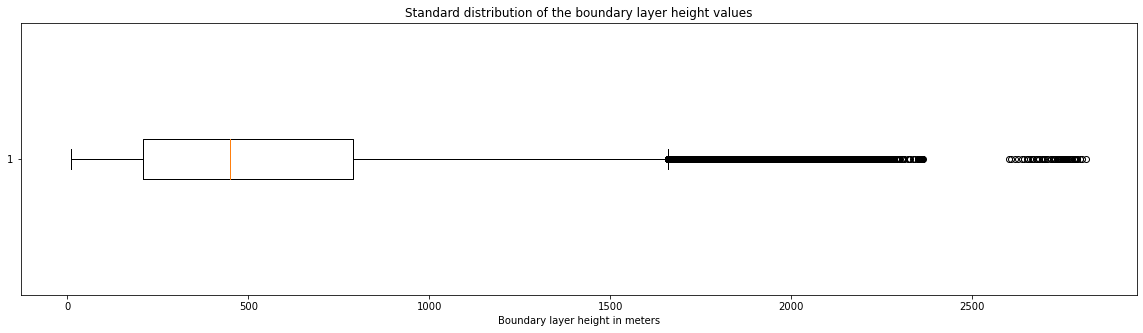

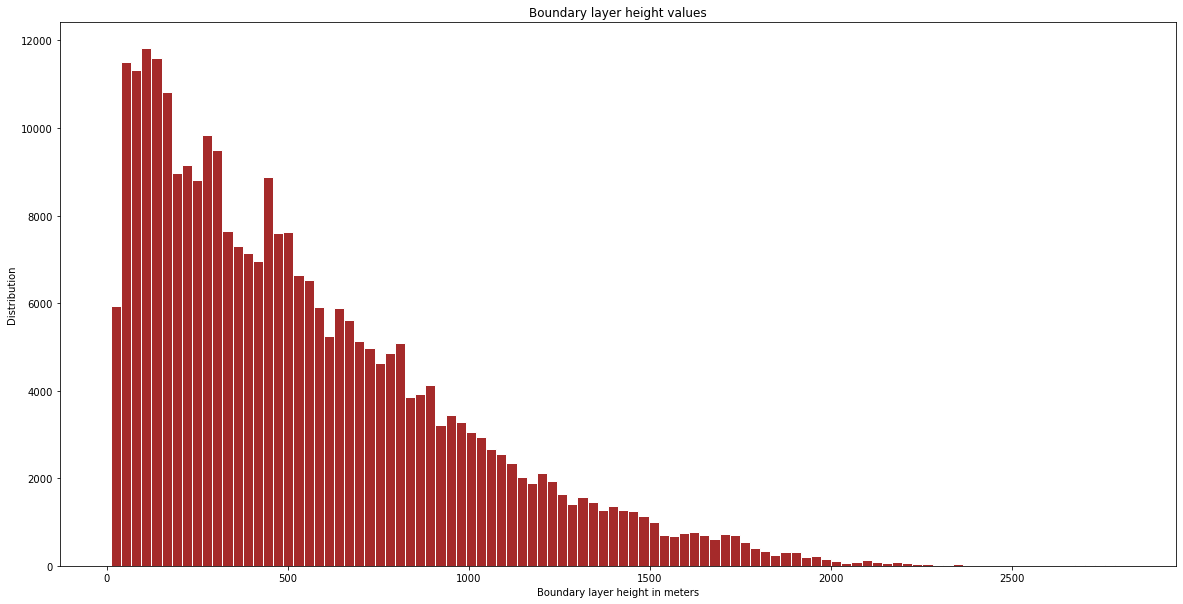

In [6]:
print("Skewness per column:")
print(df_meteo.skew(numeric_only=True))

plt.figure(figsize=(20,5))
plt.boxplot(df_meteo['blh'], vert=False)
plt.title("Standard distribution of the boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.show()

plt.figure(figsize=(20,10))
plt.hist(df_meteo['blh'], edgecolor='white', color='brown', bins=100)
plt.title("Boundary layer height values")
plt.xlabel("Boundary layer height in meters")
plt.ylabel("Distribution")
plt.show()

<h4><font color=black>Conclusion</font></h4>

Like you can see the skewness of the graphs above are positive skew. Most of the boundary layer heights are close to zero. You also don't see a lot of outliers on the graph. 


In [7]:
postalcode_df_meteo = df_meteo[df_meteo['PC4'] == 5611]
postalcode_df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
2520,2021-04-16 00:00:00,5611,55.296520,3.115509,238.078293,0.332752,0.000000
2101,2021-03-29 13:00:00,5611,219.468674,4.904621,742.367920,0.001313,652.097847
3881,2021-06-11 17:00:00,5611,160.397476,3.939859,988.194824,0.983121,282.171493
8306,2021-12-13 02:00:00,5611,227.048981,3.708283,446.310944,0.997900,0.000000
1192,2021-02-19 16:00:00,5611,277.243713,4.626352,697.926880,0.983564,115.919010
5689,2021-08-26 01:00:00,5611,152.829620,3.530709,570.889771,1.000000,0.000000
8530,2021-12-22 10:00:00,5611,280.494904,2.000398,117.867874,0.987831,111.383038
7566,2021-11-12 06:00:00,5611,282.732574,3.374478,176.327988,0.839939,0.000000
453,2021-01-19 21:00:00,5611,239.951950,7.430886,970.155579,0.998785,0.000000
7021,2021-10-20 13:00:00,5611,230.019989,7.722869,1339.335815,0.869287,261.970347


<h4><font color=mediumvioletred>Visualize windspeed compared to solar surface radiation downwards</font></h4>

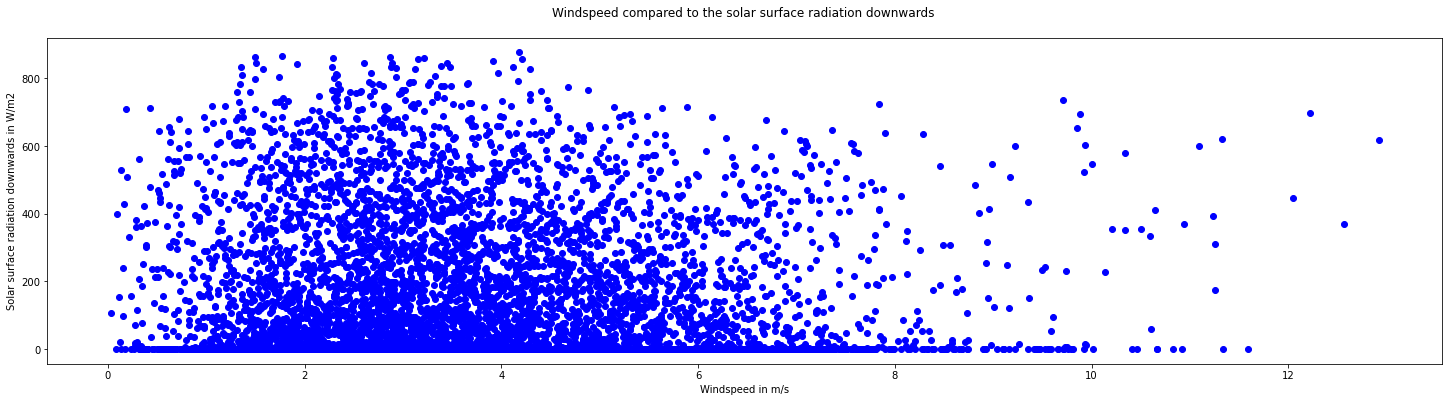

In [8]:
fig, ax = plt.subplots(figsize=(25, 6))
scatter = ax.scatter((postalcode_df_meteo["ws"]),
                list(postalcode_df_meteo["ssrd"]),
                color="blue")

ax.set(title="Windspeed compared to the solar surface radiation downwards \n",
      xlabel="Windspeed in m/s",
      ylabel="Solar surface radiation downwards in W/m2");

<h4><font color=black>Conclusion</font></h4>

In the graph above you can see that the solar surface rediation downwards almost doesn't appear when the windspeed is above 8m/s. So there is a little bit of a correlation between the windspeed and SSRD. 

<h4><font color=mediumvioletred>Visualize windspeed in September from postal code 5611</font></h4>

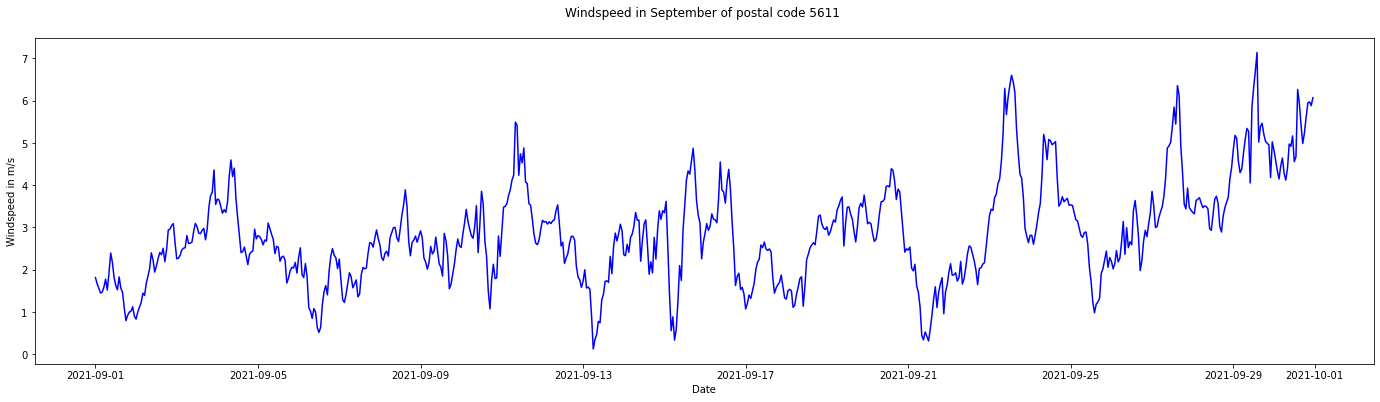

In [30]:
one_month_postalcode_df_meteo = postalcode_df_meteo[postalcode_df_meteo['date']. dt. strftime('%Y-%m')=='2021-09']

fig, ax = plt.subplots(figsize=(24, 6))
plot = ax.plot(list(one_month_postalcode_df_meteo["date"]),
                list(one_month_postalcode_df_meteo["ws"]),
                color="blue")

ax.set(title="Windspeed in September of postal code 5611 \n",
      xlabel="Date",
      ylabel="Windspeed in m/s");


<h4><font color=black>Conclusion</font></h4>

No real conclusion can be drawn from just looking at the windspeed data. 


<h4><font color=mediumvioletred>Merge meteo and air pollution dataset and show sample</font></h4>

In [10]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
45806,2021-11-29 14:00:00,5641,154.444077,2.492019,472.537384,0.653141,131.976710,11.455404,5.301847,33.605484,21.986567,1.152518
5243,2021-10-19 11:00:00,5613,235.516190,5.596204,568.626221,1.000000,59.737070,13.145652,7.434297,23.046706,15.078430,6.278133
13458,2021-12-09 17:00:00,5616,251.817932,3.901652,450.098511,0.878527,0.000000,26.342360,34.193960,31.169573,0.546010,2.889358
20455,2021-12-10 06:00:00,5622,309.391022,5.038445,772.291504,0.955260,0.000000,15.312570,24.751340,16.507434,0.305147,0.954300
22167,2021-11-14 15:00:00,5623,23.344315,3.235455,646.844849,1.000000,49.697656,20.952375,17.720667,22.834014,14.939275,3.618708
13107,2021-11-25 03:00:00,5616,210.056366,1.333244,113.924500,1.000000,0.000000,31.997759,29.383343,39.481126,25.830737,0.715218
26019,2021-10-12 03:00:00,5625,187.916870,3.426445,346.808319,0.987905,0.000000,13.056168,9.343061,24.727441,16.178060,3.489792
36175,2021-11-16 07:00:00,5629,79.670891,1.402366,221.338470,0.989658,0.000000,50.832058,36.298061,30.080628,19.680411,4.982178
43776,2021-12-11 23:00:00,5633,253.098709,4.297417,326.864197,0.946981,0.000000,24.658640,37.501910,14.795515,0.136580,2.413979
54786,2021-11-15 18:00:00,5645,45.620312,2.651459,479.490173,1.000000,0.000000,22.337824,15.390236,29.848808,19.528741,5.158636


<h4><font color=mediumvioletred>Show corrolation between merged meteo and air pollution data</font></h4>

In [11]:
df_meteo_air_pollution.corr(method='spearman')

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,-0.000203,-0.001175,-0.000395,-0.000085,0.000106,-0.026865,-0.028674,-0.034462,-0.027125,0.004346
wd,-0.000203,1.000000,0.190082,0.048322,0.050032,0.032333,-0.148475,-0.106274,-0.161741,-0.109364,-0.008121
ws,-0.001175,0.190082,1.000000,0.807271,0.176822,0.073962,-0.607904,-0.472557,-0.591700,-0.499212,-0.212465
blh,-0.000395,0.048322,0.807271,1.000000,0.200182,0.341155,-0.615602,-0.542800,-0.655762,-0.502562,-0.337730
tcc,-0.000085,0.050032,0.176822,0.200182,1.000000,0.001251,-0.031441,0.110042,-0.105527,-0.186421,-0.208994
ssrd,0.000106,0.032333,0.073962,0.341155,0.001251,1.000000,-0.059004,-0.158170,-0.206825,-0.049303,-0.076840
pm10,-0.026865,-0.148475,-0.607904,-0.615602,-0.031441,-0.059004,1.000000,0.886844,0.560476,0.283385,0.336788
pm2.5,-0.028674,-0.106274,-0.472557,-0.542800,0.110042,-0.158170,0.886844,1.000000,0.431592,0.014917,0.189855
no2,-0.034462,-0.161741,-0.591700,-0.655762,-0.105527,-0.206825,0.560476,0.431592,1.000000,0.735620,0.394545
no,-0.027125,-0.109364,-0.499212,-0.502562,-0.186421,-0.049303,0.283385,0.014917,0.735620,1.000000,0.371746


<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and windspeed</font></h4>

-0.4220468437258586


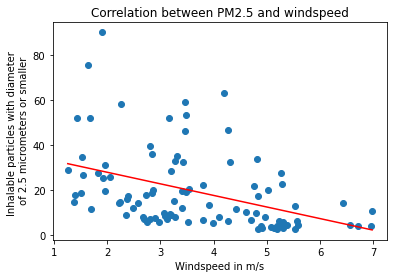

In [12]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ws"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ws"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ws"]), np.poly1d(np.polyfit(group_by_day["ws"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ws"])), color='red')
plt.title('Correlation between PM2.5 and windspeed')
plt.xlabel('Windspeed in m/s')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=black>Conclusion</font></h4>

The inhalable particles with diameter of 2.5 micrometers or smaller keep decreasing when the windspeed keep increasing. So there is a low negative correlation between the two. Which means with higher wind speeds there are less PM2.5 particals in the air.  

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and boundary layer height</font></h4>

-0.5270951619288825


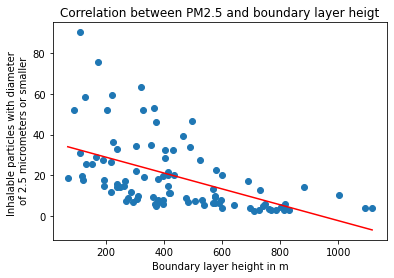

In [13]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["blh"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["blh"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["blh"]), np.poly1d(np.polyfit(group_by_day["blh"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["blh"])), color='red')
plt.title('Correlation between PM2.5 and boundary layer heigt')
plt.xlabel('Boundary layer height in m')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=black>Conclusion</font></h4>

The inhalable particles with diameter of 2.5 micrometers or smaller keep decreasing when the boundary layer height keep increasing. So there is a low negative correlation between the two. Which means that how higher the boundary layer is the less there are PM2.5 particals in the air.

<h4><font color=mediumvioletred>Show corrolation between particulate matter smaller than 2.5 um and solar surface radiation downwards</font></h4>

-0.44465439902953424


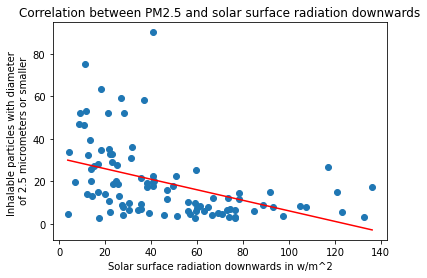

In [14]:
group_by_day = df_meteo_air_pollution.groupby(pd.Grouper(freq='D', key='date')).mean()
ws_pm25_corr = group_by_day["ssrd"].corr(group_by_day["pm2.5"])
print(ws_pm25_corr)
plt.scatter(group_by_day["ssrd"], group_by_day["pm2.5"])
plt.plot(np.unique(group_by_day["ssrd"]), np.poly1d(np.polyfit(group_by_day["ssrd"], group_by_day["pm2.5"], 1))
         (np.unique(group_by_day["ssrd"])), color='red')
plt.title('Correlation between PM2.5 and solar surface radiation downwards')
plt.xlabel('Solar surface radiation downwards in w/m^2')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller');
# Particulate matter <2.5um in ug/m3

<h4><font color=black>Conclusion</font></h4>



<h4><font color=mediumvioletred> Visualize the boundary layer height for the first week of November of postal code 5611</font></h4>

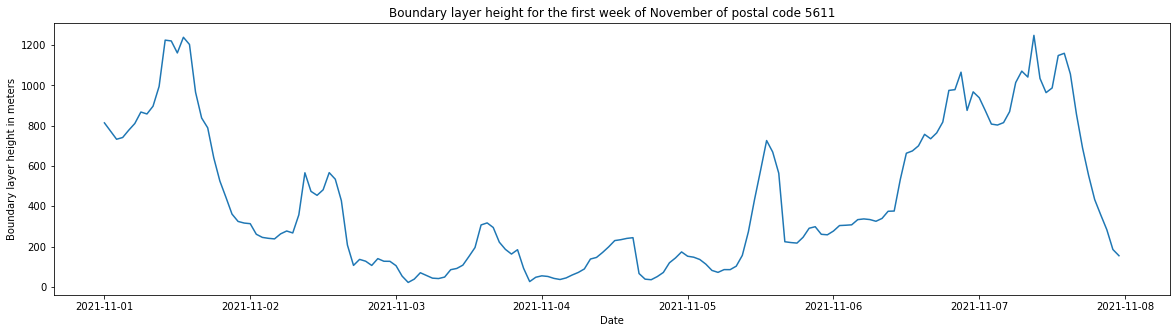

In [26]:
# Combined meto and air polution data for postalcode 5611
postalcode_df_meteo_air_polution = df_meteo_air_pollution[df_meteo_air_pollution['PC4'] == 5611]

# Combined data for the first week of november 2021 from postal code 5611 (24 * 7 = 168 entries)
one_week_postalcode_df_meteo_air_polution = postalcode_df_meteo_air_polution[postalcode_df_meteo_air_polution['date']. dt. strftime('%Y-%m')=='2021-11'].head(168)
    
plt.figure(figsize = (20 ,5))

plt.plot(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['blh'])
 
# Adding Title to the Plot
plt.title('Boundary layer height for the first week of November of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Boundary layer height in meters')
  
plt.show()

<h4><font color=black>Conclusion</font></h4>

In the graph above you can see that almost every day at around noon the Boundary layer height increases and decreases later at night. That is because the surface temperature at noon elevated lead to increased sensitive heat flux, and as a result, the boundary layer height will develop higher during daytime. 

<h4><font color=mediumvioletred> Visualize particulate matter smaller than 2.5 micrometers for the first week of November of postal code 5611</font></h4>

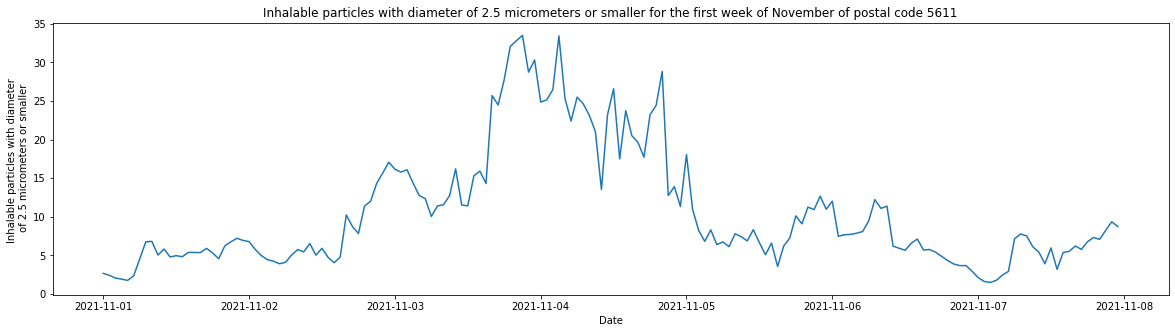

In [28]:
plt.figure(figsize = (20 ,5))

plt.plot(one_week_postalcode_df_meteo_air_polution['date'], one_week_postalcode_df_meteo_air_polution['pm2.5'])
 
# Adding Title to the Plot
plt.title('Inhalable particles with diameter of 2.5 micrometers or smaller for the first week of November of postal code 5611')

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Inhalable particles with diameter \n of 2.5 micrometers or smaller')
  
plt.show()

<h4><font color=black>Conclusion</font></h4>

In the graph above are all the PM2.5 particals for the first week of November. You can see that almost every night the particals are lower then during the day. It is hard to see peaks in PM2.5 during the day but you can see a clearly difference between the particals at night and day. 

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>